In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

new_columns = ['Lever position (lp)', 'Ship speed (v) [knots]', 'Gas Turbine (GT) shaft torque (GTT) [kN m]', 'GT rate of revolutions (GTn) [rpm]',
              'Gas Generator rate of revolutions (GGn) [rpm]', 'Starboard Propeller Torque (Ts) [kN]', 'Port Propeller Torque (Tp) [kN]',
              'Hight Pressure (HP) Turbine exit temperature (T48) [C]', 'GT Compressor inlet air temperature (T1) [C]', 'GT Compressor outlet air temperature (T2) [C]',
              'HP Turbine exit pressure (P48) [bar]', 'GT Compressor inlet air pressure (P1) [bar]', 'GT Compressor outlet air pressure (P2) [bar]',
              'GT exhaust gas pressure (Pexh) [bar]', 'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]', 'GT Compressor decay state coefficient',
              'GT Turbine decay state coefficient']

df = pd.read_csv('data1.csv', header = None, names = new_columns)

In [2]:
df.head()

,Lever position (lp),Ship speed (v) [knots],Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.14,3.0,290.0,1350.0,6680.0,7.58,7.58,464.0,288.0,551.0,1.10,0.998,5.95,1.02,7.14,0.082,0.95,0.975
1,2.09,6.0,6960.0,1380.0,6830.0,28.20,28.20,635.0,288.0,582.0,1.33,0.998,7.28,1.02,10.70,0.287,0.95,0.975
2,3.14,9.0,8380.0,1390.0,7110.0,60.40,60.40,606.0,288.0,588.0,1.39,0.998,7.57,1.02,13.10,0.259,0.95,0.975
3,4.16,12.0,14700.0,1550.0,7790.0,114.00,114.00,661.0,288.0,614.0,1.66,0.998,9.01,1.02,18.10,0.358,0.95,0.975
4,5.14,15.0,21600.0,1920.0,8490.0,175.00,175.00,731.0,288.0,646.0,2.08,0.998,11.20,1.03,26.40,0.522,0.95,0.975


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
Lever position (lp)                                       11934 non-null float64
Ship speed (v) [knots]                                    11934 non-null float64
Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null float64
GT rate of revolutions (GTn) [rpm]                        11934 non-null float64
Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null float64
Starboard Propeller Torque (Ts) [kN]                      11934 non-null float64
Port Propeller Torque (Tp) [kN]                           11934 non-null float64
Hight Pressure (HP) Turbine exit temperature (T48) [C]    11934 non-null float64
GT Compressor inlet air temperature (T1) [C]              11934 non-null float64
GT Compressor outlet air temperature (T2) [C]             11934 non-null float64
HP Turbine exit pressure (P48) [bar]                      11934 non-null float64


In [4]:
df.isnull().sum()

Lever position (lp)                                       0
Ship speed (v) [knots]                                    0
Gas Turbine (GT) shaft torque (GTT) [kN m]                0
GT rate of revolutions (GTn) [rpm]                        0
Gas Generator rate of revolutions (GGn) [rpm]             0
Starboard Propeller Torque (Ts) [kN]                      0
Port Propeller Torque (Tp) [kN]                           0
Hight Pressure (HP) Turbine exit temperature (T48) [C]    0
GT Compressor inlet air temperature (T1) [C]              0
GT Compressor outlet air temperature (T2) [C]             0
HP Turbine exit pressure (P48) [bar]                      0
GT Compressor inlet air pressure (P1) [bar]               0
GT Compressor outlet air pressure (P2) [bar]              0
GT exhaust gas pressure (Pexh) [bar]                      0
Turbine Injecton Control (TIC) [%]                        0
Fuel flow (mf) [kg/s]                                     0
GT Compressor decay state coefficient   

In [5]:
df.describe()

,Lever position (lp),Ship speed (v) [knots],Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.167778,15.000000,27249.165996,2137.177811,8200.955254,227.297807,227.297807,735.495726,288.0,646.215100,2.353415,9.980000e-01,12.297610,1.030000,33.641437,0.662556,0.97500,0.9875
std,2.627068,7.746291,22159.091763,774.184863,1091.297870,200.487306,200.487306,173.680016,0.0,72.676721,1.084821,2.533635e-13,5.337468,0.010541,25.841674,0.507320,0.01472,0.0075
min,1.140000,3.000000,254.000000,1310.000000,6590.000000,5.300000,5.300000,442.000000,288.0,540.000000,1.090000,9.980000e-01,5.830000,1.020000,0.000000,0.068000,0.95000,0.9750
25%,3.140000,9.000000,8380.000000,1390.000000,7060.000000,60.300000,60.300000,590.000000,288.0,578.000000,1.390000,9.980000e-01,7.450000,1.020000,13.700000,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21600.000000,1920.000000,8480.000000,175.000000,175.000000,706.000000,288.0,637.000000,2.080000,9.980000e-01,11.100000,1.030000,25.300000,0.496000,0.97500,0.9875
75%,7.150000,21.000000,39000.000000,2680.000000,9130.000000,332.000000,332.000000,834.000000,288.0,694.000000,2.980000,9.980000e-01,15.700000,1.040000,44.600000,0.882000,0.98800,0.9940
max,9.300000,27.000000,72800.000000,3560.000000,9800.000000,645.000000,645.000000,1120.000000,288.0,789.000000,4.560000,9.980000e-01,23.100000,1.050000,92.600000,1.830000,1.00000,1.0000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lever position (lp),11934.0,5.167778,2.627068e+00,1.140,3.140,5.1400,7.150,9.300
Ship speed (v) [knots],11934.0,15.000000,7.746291e+00,3.000,9.000,15.0000,21.000,27.000
Gas Turbine (GT) shaft torque (GTT) [kN m],11934.0,27249.165996,2.215909e+04,254.000,8380.000,21600.0000,39000.000,72800.000
GT rate of revolutions (GTn) [rpm],11934.0,2137.177811,7.741849e+02,1310.000,1390.000,1920.0000,2680.000,3560.000
Gas Generator rate of revolutions (GGn) [rpm],11934.0,8200.955254,1.091298e+03,6590.000,7060.000,8480.0000,9130.000,9800.000
Starboard Propeller Torque (Ts) [kN],11934.0,227.297807,2.004873e+02,5.300,60.300,175.0000,332.000,645.000
Port Propeller Torque (Tp) [kN],11934.0,227.297807,2.004873e+02,5.300,60.300,175.0000,332.000,645.000
Hight Pressure (HP) Turbine exit temperature (T48) [C],11934.0,735.495726,1.736800e+02,442.000,590.000,706.0000,834.000,1120.000
GT Compressor inlet air temperature (T1) [C],11934.0,288.000000,0.000000e+00,288.000,288.000,288.0000,288.000,288.000
GT Compressor outlet air temperature (T2) [C],11934.0,646.215100,7.267672e+01,540.000,578.000,637.0000,694.000,789.000


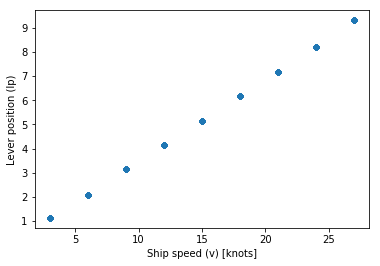

In [7]:
df.plot(kind = 'scatter', x = "Ship speed (v) [knots]", y ="Lever position (lp)")
plt.show()

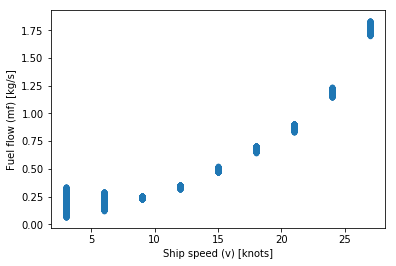

In [8]:
df.plot(kind = 'scatter', x = "Ship speed (v) [knots]", y ="Fuel flow (mf) [kg/s]")
plt.show()

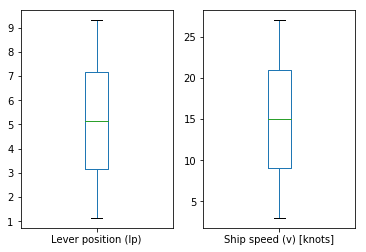

In [10]:
cols = ['Lever position (lp)', 'Ship speed (v) [knots]']

# Generate the box plots
df[cols].plot(kind = 'box', subplots =True)

# Display the plot
plt.show()

In [8]:
data_array = df.values

In [12]:
print (data_array)

[[  1.14000000e+00   3.00000000e+00   2.90000000e+02 ...,   8.20000000e-02
    9.50000000e-01   9.75000000e-01]
 [  2.09000000e+00   6.00000000e+00   6.96000000e+03 ...,   2.87000000e-01
    9.50000000e-01   9.75000000e-01]
 [  3.14000000e+00   9.00000000e+00   8.38000000e+03 ...,   2.59000000e-01
    9.50000000e-01   9.75000000e-01]
 ..., 
 [  7.15000000e+00   2.10000000e+01   3.90000000e+04 ...,   8.34000000e-01
    1.00000000e+00   1.00000000e+00]
 [  8.21000000e+00   2.40000000e+01   5.10000000e+04 ...,   1.15000000e+00
    1.00000000e+00   1.00000000e+00]
 [  9.30000000e+00   2.70000000e+01   7.28000000e+04 ...,   1.70000000e+00
    1.00000000e+00   1.00000000e+00]]


In [11]:
print (data_array.shape)

(11934L, 18L)


In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
data_array_minmax = min_max_scaler.fit_transform(data_array)
data_array_minmax

array([[  0.00000000e+00,   0.00000000e+00,   4.96236870e-04, ...,
          7.94551646e-03,   0.00000000e+00,   0.00000000e+00],
       [  1.16421569e-01,   1.25000000e-01,   9.24379015e-02, ...,
          1.24290579e-01,   0.00000000e+00,   0.00000000e+00],
       [  2.45098039e-01,   2.50000000e-01,   1.12011689e-01, ...,
          1.08399546e-01,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  7.36519608e-01,   7.50000000e-01,   5.34088716e-01, ...,
          4.34733258e-01,   1.00000000e+00,   1.00000000e+00],
       [  8.66421569e-01,   8.75000000e-01,   6.99501006e-01, ...,
          6.14074915e-01,   1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          9.26220204e-01,   1.00000000e+00,   1.00000000e+00]])

In [14]:
from sklearn.model_selection import train_test_split
data_array_train, data_array_test = train_test_split (data_array, test_size=0.3, random_state=42)

In [15]:
print (data_array_train.shape)

(8353L, 18L)


In [17]:
print (data_array_test.shape)

(3581L, 18L)


In [18]:
print (data_array_train)

[[  6.18000000e+00   1.80000000e+01   2.98000000e+04 ...,   6.78000000e-01
    9.91000000e-01   9.81000000e-01]
 [  2.09000000e+00   6.00000000e+00   3.15000000e+03 ...,   1.56000000e-01
    9.59000000e-01   9.93000000e-01]
 [  5.14000000e+00   1.50000000e+01   2.16000000e+04 ...,   4.72000000e-01
    9.98000000e-01   1.00000000e+00]
 ..., 
 [  9.30000000e+00   2.70000000e+01   7.28000000e+04 ...,   1.80000000e+00
    9.73000000e-01   9.75000000e-01]
 [  6.18000000e+00   1.80000000e+01   2.98000000e+04 ...,   6.82000000e-01
    9.53000000e-01   9.92000000e-01]
 [  8.21000000e+00   2.40000000e+01   5.10000000e+04 ...,   1.21000000e+00
    9.81000000e-01   9.76000000e-01]]


In [19]:
print (data_array_test)

[[  3.14000000e+00   9.00000000e+00   8.38000000e+03 ...,   2.37000000e-01
    9.93000000e-01   9.87000000e-01]
 [  9.30000000e+00   2.70000000e+01   7.28000000e+04 ...,   1.76000000e+00
    9.94000000e-01   9.77000000e-01]
 [  7.15000000e+00   2.10000000e+01   3.90000000e+04 ...,   8.70000000e-01
    9.89000000e-01   9.82000000e-01]
 ..., 
 [  5.14000000e+00   1.50000000e+01   2.16000000e+04 ...,   4.89000000e-01
    9.74000000e-01   9.95000000e-01]
 [  3.14000000e+00   9.00000000e+00   8.38000000e+03 ...,   2.30000000e-01
    9.87000000e-01   1.00000000e+00]
 [  6.18000000e+00   1.80000000e+01   2.98000000e+04 ...,   6.78000000e-01
    9.52000000e-01   9.95000000e-01]]
